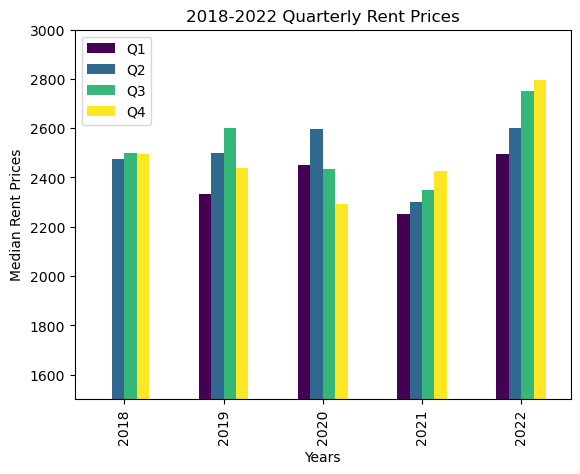

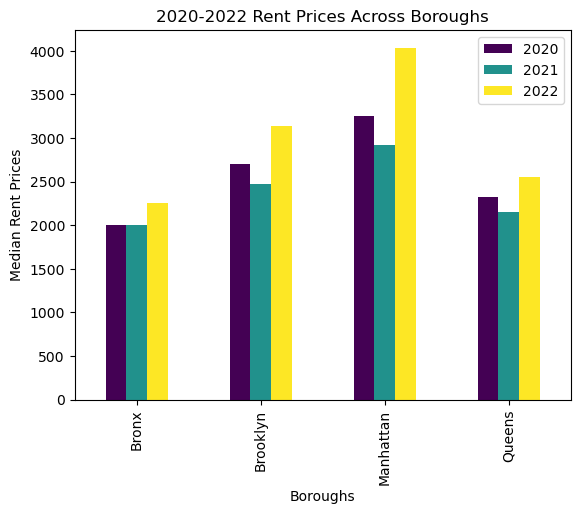

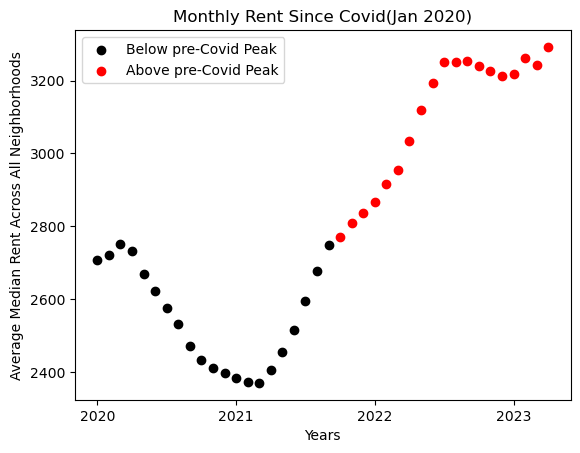

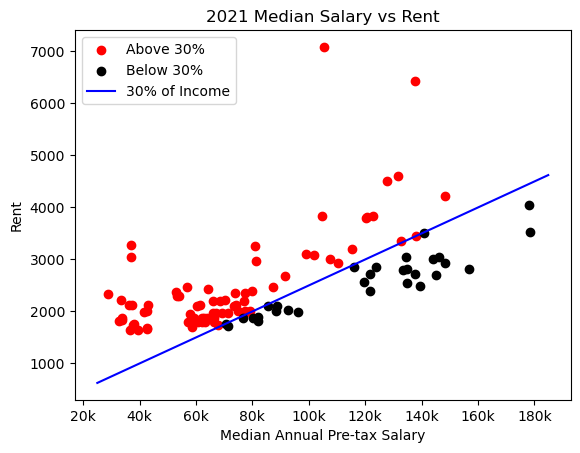

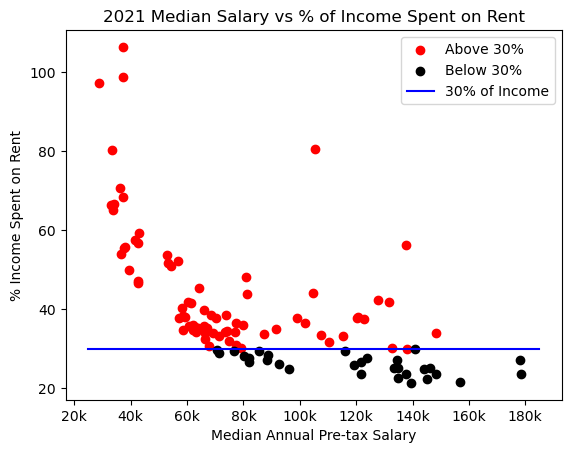

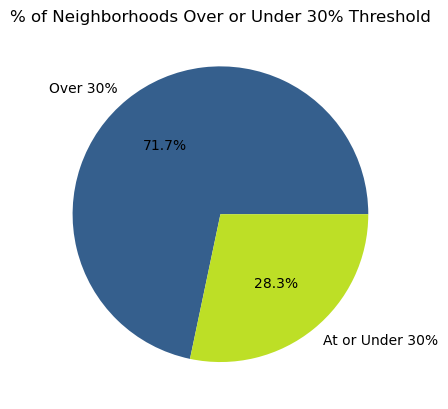

In [1]:
"""
This program is used to plot data
"""
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#Plots quarterly rent data over the past 5 years
QRData = pd.read_csv('QuarterlyRentData.csv')
QRData.index = QRData['Unnamed: 0']
del QRData['Unnamed: 0']
colors = mpl.colormaps['viridis']
QRData.plot(kind='bar', title='2018-2022 Quarterly Rent Prices', xlabel='Years', ylabel='Median Rent Prices', ylim=[1500, 3000], colormap=colors)
plt.show()

#Bar plot showing yearly rent price increases across boroughs
BorRData = pd.read_csv('BoroughRentData.csv')
BorRData.plot(kind='bar', title='2020-2022 Rent Prices Across Boroughs', xlabel='Boroughs', ylabel='Median Rent Prices', colormap=colors)
plt.show()

#Plotting rent data since covid
CRData = pd.read_csv('CovidRentData.csv')
evenpoint = CRData['Mean Rent'][2]
YearData = {'2020': [], '2021': [], '2022': [], '2023': []}
count = -1
repeatCount = 0
aboveEven = []
belowEven = []
for i in CRData['Year-Month']:
    count+=1
    if repeatCount > 11:
        repeatCount = 0
    #Manipulates Year data into a format more applicable to representing the data
    if '2020' in i:
        YearData['2020'].append(2020+repeatCount/12)
    elif '2021' in i:
        YearData['2021'].append(2021+repeatCount/12)
    elif '2022' in i:
        YearData['2022'].append(2022+repeatCount/12)
    elif '2023' in i:
        YearData['2023'].append(2023+repeatCount/12)
    #Splits Rent data into above and below the pre-Covid peak
    if CRData['Mean Rent'][count] <= evenpoint:
        belowEven.append(CRData['Mean Rent'][count])
    else:
        aboveEven.append(CRData['Mean Rent'][count])
    repeatCount+=1
#Combines Year data to fit the split rent data
belowEvenYear = YearData['2020'] + YearData['2021'][:-3]
aboveEvenYear = YearData['2021'][-3:] + YearData['2022'] + YearData['2023']
plt.scatter(belowEvenYear, belowEven, color='black', label='Below pre-Covid Peak')
plt.scatter(aboveEvenYear, aboveEven, color='red', label='Above pre-Covid Peak')
plt.xticks([2020, 2021, 2022, 2023])
plt.xlabel('Years')
plt.ylabel('Average Median Rent Across All Neighborhoods')
plt.title('Monthly Rent Since Covid(Jan 2020)')
plt.legend()
plt.show()

#Scatter plot to display rent data vs income data
MedRIData = pd.read_csv('MedianRentIncData.csv')
RentPerAbove = [] #list of 2021 Rent above 30% income
IncAbove = [] #list of 2021 Inc above 30
IncBelow = [] #list of 2021 Inc below 30
RentPerBelow = [] #list of 2021 Rent below 30% income
aRent = MedRIData['Median 2021 Rent']
aInc = MedRIData['Median Monthly 2021 Income']
for i in range(len(aRent)):
    if aRent[i] > (aInc[i] * .3):
        RentPerAbove.append(aRent[i])
        IncAbove.append(aInc[i] * 12)
    else:
        RentPerBelow.append(aRent[i])
        IncBelow.append(aInc[i] * 12)
yFut = []
for i in range(25000,185000, 100):
    yFut.append((i/12)*.3)
plt.scatter(IncAbove, RentPerAbove, color = 'red', label='Above 30%')
plt.scatter(IncBelow, RentPerBelow, color = 'black', label='Below 30%')
plt.plot(range(25000,185000, 100), yFut, color='blue', label='30% of Income')
plt.title('2021 Median Salary vs Rent')
plt.xlabel('Median Annual Pre-tax Salary')
plt.ylabel('Rent')
plt.xticks([20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000], ['20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k'])
plt.legend()
plt.show()

#Scatter plot to display % of income spent on rent data vs income data
aRentPerAbove = [] #list of 2021 Rent% above 30
IncAbove = [] #Reset IncAbove & IncBelow
IncBelow = [] 
aRentPerBelow = [] #list of 2021 Rent% below 30
aPer = MedRIData['Actual % of Income Spent on Rent 2021']
for i in range(len(aPer)):
    if aPer[i] > 30:
        aRentPerAbove.append(aPer[i])
        IncAbove.append(MedRIData['Median Monthly 2021 Income'][i] * 12)
    else:
        aRentPerBelow.append(aPer[i])
        IncBelow.append(MedRIData['Median Monthly 2021 Income'][i] * 12)
plt.scatter(IncAbove, aRentPerAbove, color = 'red', label='Above 30%')
plt.scatter(IncBelow, aRentPerBelow, color = 'black', label='Below 30%')
plt.plot([25000,185000], [30,30], color='blue', label='30% of Income')
plt.title('2021 Median Salary vs % of Income Spent on Rent')
plt.xlabel('Median Annual Pre-tax Salary')
plt.ylabel('% Income Spent on Rent')
plt.xticks([20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000], ['20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k'])
plt.legend()
plt.show()

#Pie chart to show % of neighborhoods that are over 30% income threshold
size = [len(aRentPerAbove)/len(aPer), len(aRentPerBelow)/len(aPer)]
labels = 'Over 30%', 'At or Under 30%'
plt.pie(size, labels=labels, autopct='%1.1f%%', colors=[(0.206756, 0.371758, 0.553117, 1.0), colors(.9)])
plt.title('% of Neighborhoods Over or Under 30% Threshold')
plt.show()